In [2]:
pip install librosa


   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 1.0 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.0 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import os  # to use operating system dependent functionality
import librosa  # to extract speech features
import wave  # read and write WAV files
import matplotlib.pyplot as plt  # generate visualizations

[link text](https://)

## Data set loading

In [4]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import os
import zipfile

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



!kaggle datasets download -d uldisvalainis/audio-emotions


Dataset URL: https://www.kaggle.com/datasets/uldisvalainis/audio-emotions
License(s): unknown
 99% 1.11G/1.12G [00:07<00:00, 213MB/s]
100% 1.12G/1.12G [00:07<00:00, 156MB/s]


In [ ]:
!unzip audio-emotions.zip -d audio_emotions


Streaming output truncated to the last 5000 lines.
  inflating: audio_emotions/Emotions/Happy/OAF_keg_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_kick_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_kill_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_king_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_kite_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_knock_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_late_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_laud_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_lean_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_learn_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_lease_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_lid_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_life_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_limb_happy.wav  
  inflating: audio_emotions/Emotions/Happy/OAF_live_

In [2]:
data_path = "Dataset/Emotions"

## Data Analysis


In [22]:
import glob
import os

# Count all .wav files in the dataset directory (including subdirectories if any)
wav_files = glob.glob(os.path.join(data_path, '**', '*.wav'), recursive=True)
print("Number of audio files in the dataset:", len(wav_files))

Number of audio files in the dataset: 12798


In [3]:
import os
import glob


# List of emotion categories (as per folder names)
emotion_categories = ['Angry', 'Fearful', 'Happy', 'Neutral', 'Sad']

# Dictionary to store count per emotion
emotion_counts = {}

# Count .wav files in each emotion folder
for emotion in emotion_categories:
    folder_path = os.path.join(data_path, emotion)
    wav_files = glob.glob(os.path.join(folder_path, '*.wav'))
    emotion_counts[emotion] = len(wav_files)

# Print the counts
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count} files")


Angry: 2167 files
Fearful: 2047 files
Happy: 2167 files
Neutral: 1795 files
Sad: 2167 files


In [4]:
import os

# Set the path to your extracted dataset folder
data_dir = "Dataset/Emotions"  

# Get emotion names (folder names) and count number of .wav files in each
emotions = sorted(os.listdir(data_dir))
counts = [len([f for f in os.listdir(os.path.join(data_dir, emo)) if f.endswith('.wav')]) for emo in emotions]


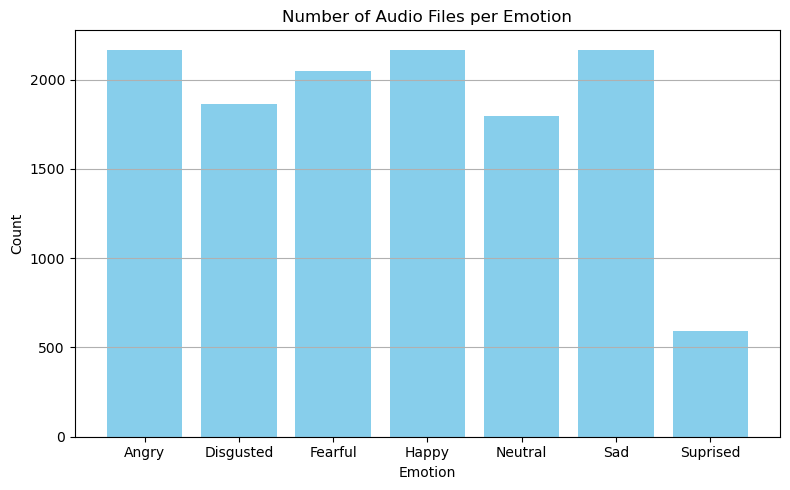

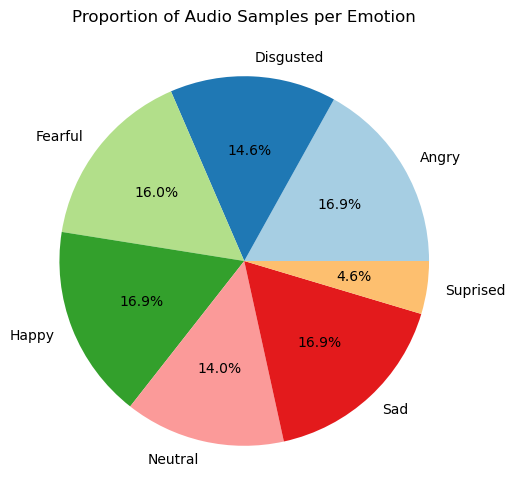

In [12]:
import matplotlib.pyplot as plt

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(emotions, counts, color='skyblue')
plt.title("Number of Audio Files per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Images/DataAnalys/emotion_bar_chart.png")  # Save
plt.show()  # Show in notebook or script output
plt.close()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=emotions, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Proportion of Audio Samples per Emotion")
plt.savefig("Images/DataAnalys/emotion_pie_chart.png")  # Save
plt.show()  # Show in notebook or script output
plt.close()


In [13]:
# One-hot encoding + count table
one_hot_vectors = np.eye(len(emotions), dtype=int)
emotion_df = pd.DataFrame(one_hot_vectors, columns=[f"{e}_flag" for e in emotions])
emotion_df.insert(0, "Emotion", emotions)
emotion_df["Count"] = counts

# Save to CSV
emotion_df.to_csv("Images/DataAnalys/emotion_distribution_onehot.csv", index=False)
print("CSV saved as 'emotion_distribution_onehot.csv'")


CSV saved as 'emotion_distribution_onehot.csv'


In [15]:
import os
import shutil
import random
import glob

# Base paths
data_path = "Dataset/Emotions"  # Replace with your dataset path
output_base_path = 'DataPreProcessing/SplitData'  # Destination path for split data

# Train/test split ratio
split_ratio = 0.2  # 20% test, 80% train

# Emotions (folder names)
emotion_folders = ['Angry', 'Fearful', 'Happy', 'Neutral', 'Sad']

# Loop through each emotion
for emotion in emotion_folders:
    emotion_path = os.path.join(data_path, emotion)
    files = glob.glob(os.path.join(emotion_path, '*.wav'))

    # Randomize and select up to 500 files
   # random.shuffle(files)
   # selected_files = files[:5] if len(files) >= 500 else files

    random.shuffle(files)
    selected_files = files 

    # Split into train/test
    split_index = int(len(selected_files) * split_ratio)
    test_files = selected_files[:split_index]
    train_files = selected_files[split_index:]

    # Destination paths
    train_emotion_path = os.path.join(output_base_path, 'train', emotion)
    test_emotion_path = os.path.join(output_base_path, 'test', emotion)
    os.makedirs(train_emotion_path, exist_ok=True)
    os.makedirs(test_emotion_path, exist_ok=True)

    # Copy files
    for file_path in train_files:
        shutil.copy(file_path, os.path.join(train_emotion_path, os.path.basename(file_path)))

    for file_path in test_files:
        shutil.copy(file_path, os.path.join(test_emotion_path, os.path.basename(file_path)))

    print(f"{emotion}: {len(train_files)} training, {len(test_files)} testing files")

# Zip the output directory
#shutil.make_archive('DataPreProcessing/SplitData/audio_emotion_split', 'zip', output_base_path)



Angry: 1734 training, 433 testing files
Fearful: 1638 training, 409 testing files
Happy: 1734 training, 433 testing files
Neutral: 1436 training, 359 testing files
Sad: 1734 training, 433 testing files


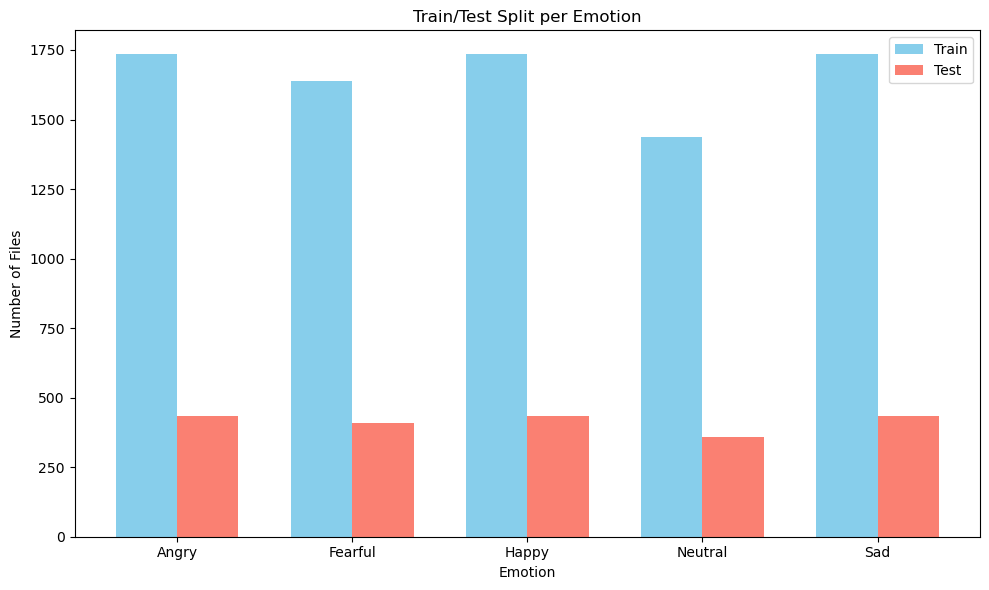

In [17]:
import matplotlib.pyplot as plt

# Prepare data for plotting
train_counts = []
test_counts = []

for emotion in emotion_folders:
    train_dir = os.path.join(output_base_path, 'train', emotion)
    test_dir = os.path.join(output_base_path, 'test', emotion)

    train_counts.append(len(glob.glob(os.path.join(train_dir, '*.wav'))))
    test_counts.append(len(glob.glob(os.path.join(test_dir, '*.wav'))))

# Plot
x = range(len(emotion_folders))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, train_counts, width=bar_width, label='Train', color='skyblue')
plt.bar([i + bar_width for i in x], test_counts, width=bar_width, label='Test', color='salmon')

plt.xlabel('Emotion')
plt.ylabel('Number of Files')
plt.title('Train/Test Split per Emotion')
plt.xticks([i + bar_width / 2 for i in x], emotion_folders)
plt.legend()
plt.tight_layout()

# Save and show
#os.makedirs("DataAnalysis", exist_ok=True)
plt.savefig("Images/DataAnalys/train_test_split_per_emotion.png")
plt.show()


In [5]:
import os
import librosa
import pandas as pd

# List of emotion folders (same as your directory names)
emotions = ['Angry', 'Fearful', 'Happy', 'Neutral', 'Sad']

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)
    pitch = librosa.yin(y, fmin=50, fmax=500).mean()
    energy = (y ** 2).mean()
    duration = librosa.get_duration(y=y, sr=sr)
    return pitch, energy, duration

def process_split(base_path):  # split is now full path
    rows = []
    for emotion in emotions:
        emotion_path = os.path.join(base_path, emotion)
        for file in os.listdir(emotion_path):
            if file.endswith('.wav'):
                path = os.path.join(emotion_path, file)
                pitch, energy, duration = extract_features(path)
                rows.append({
                    "path": path,
                    "pitch": pitch,
                    "energy": energy,
                    "duration": duration,
                    "label": emotion
                })
    return pd.DataFrame(rows)

#Generate train/test CSVs
#train_df = process_split('DataPreProcessing/SplitData/train')
# test_df = process_split('DataPreProcessing/SplitData/test')



# train_df.to_csv('DataPreProcessing/FeatureExtraction/train.csv', index=False)
# test_df.to_csv('DataPreProcessing/FeatureExtraction/test.csv', index=False)


**Create Dataset Class**

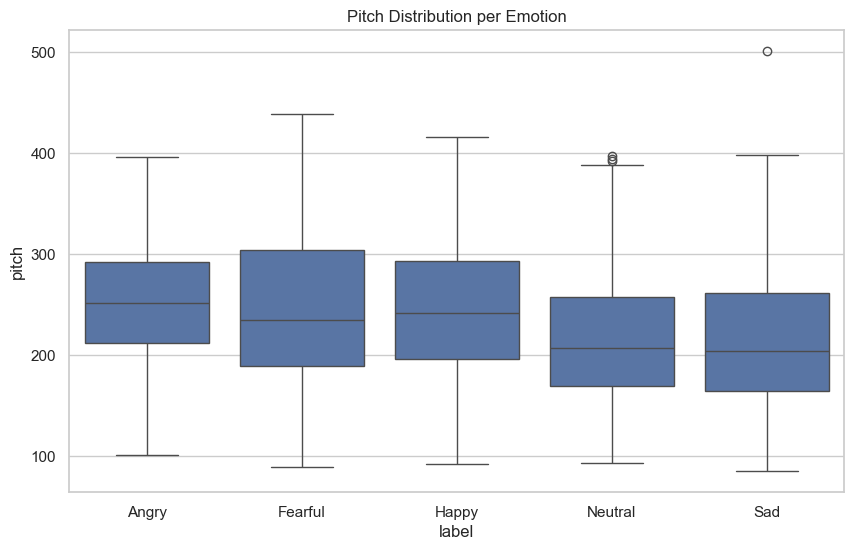

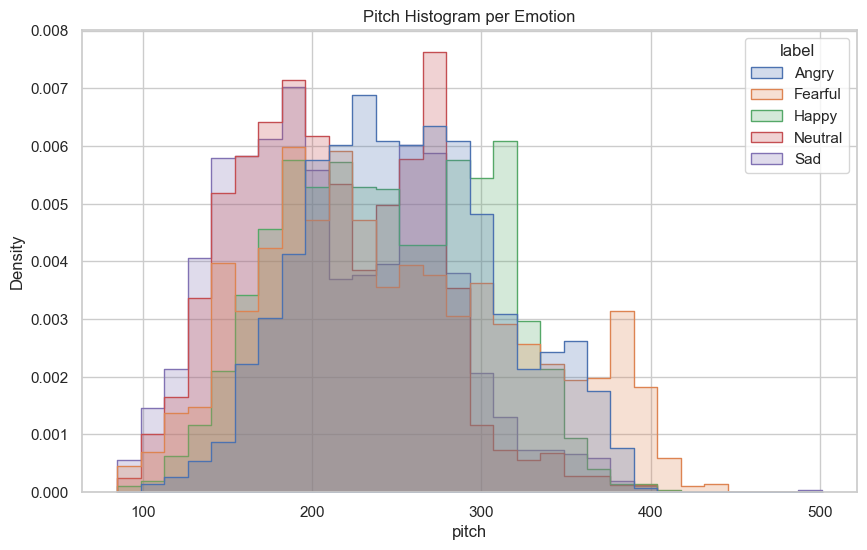

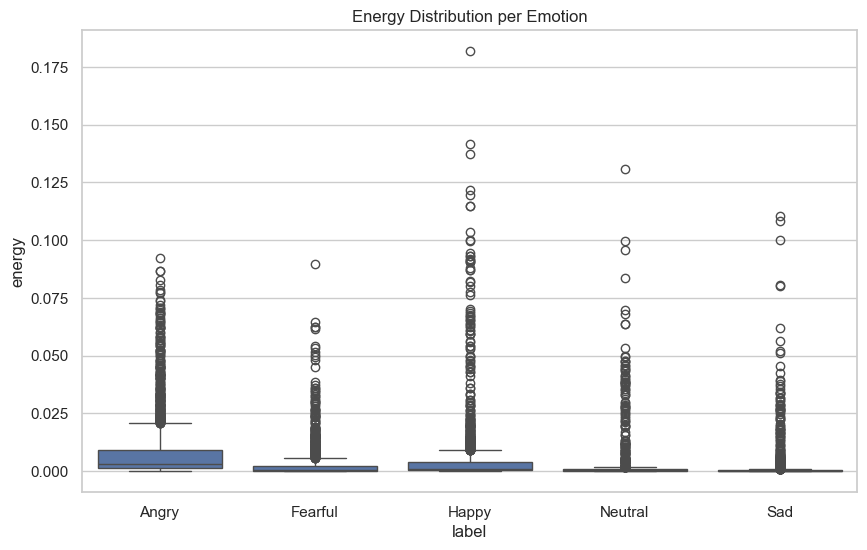

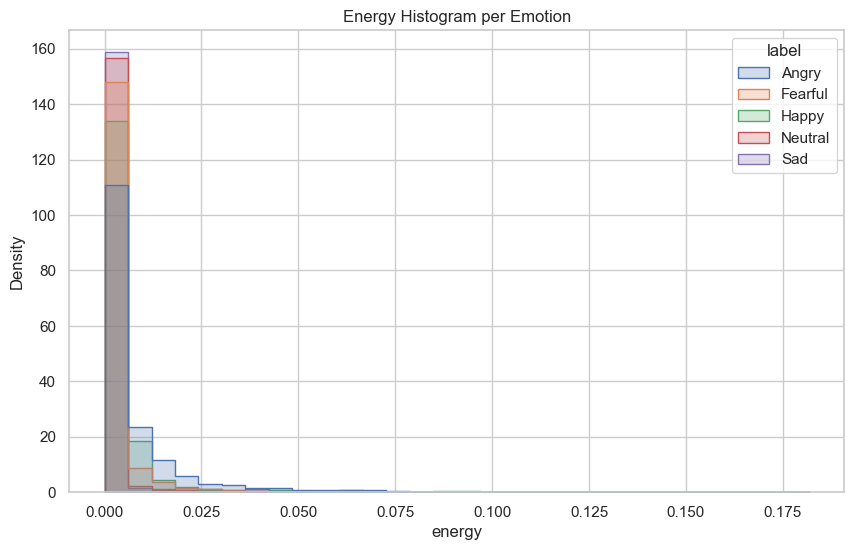

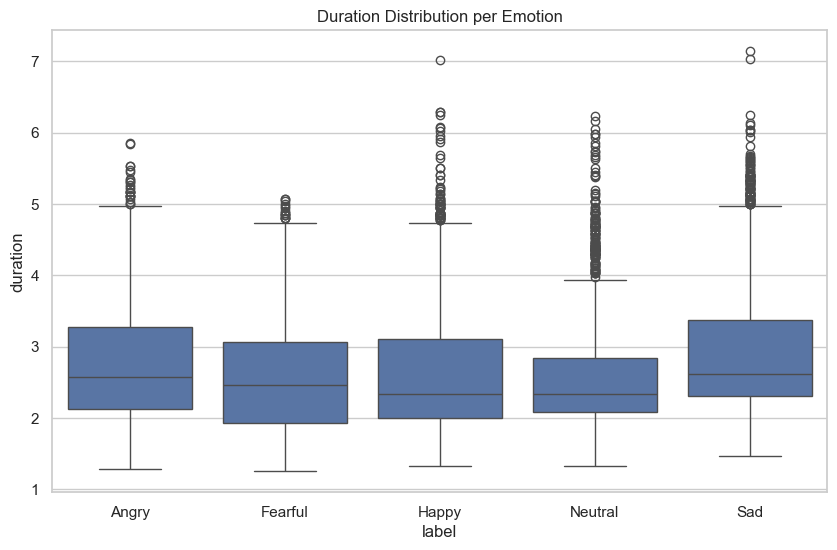

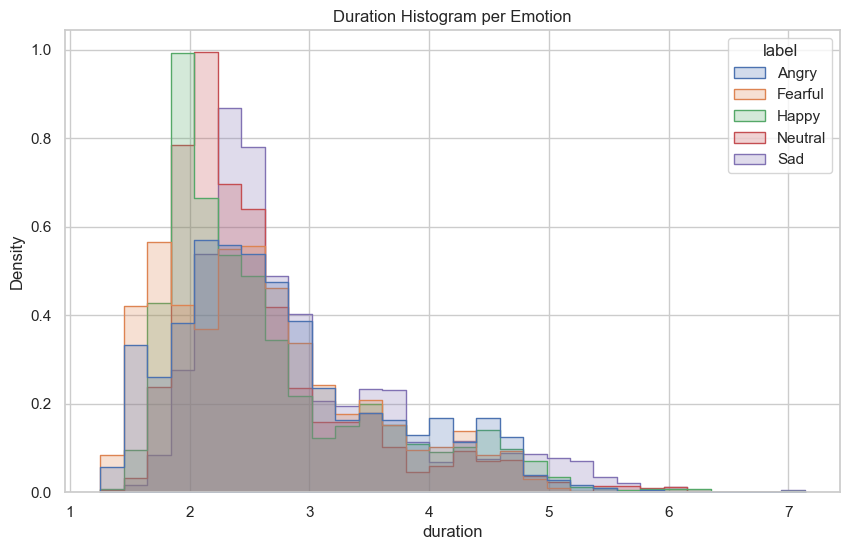

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the generated CSVs
train_df = pd.read_csv('DataPreProcessing/FeatureExtraction/train.csv')
test_df = pd.read_csv('DataPreProcessing/FeatureExtraction/test.csv')

# Merge for full visualization
full_df = pd.concat([train_df.assign(split='train'), test_df.assign(split='test')])

# Set seaborn style
sns.set(style='whitegrid')

# Create directory to save plots
os.makedirs("Images/DataAnalys/feature_plots", exist_ok=True)

# Plot for each feature
for feature in ['pitch', 'energy', 'duration']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=full_df)
    plt.title(f'{feature.capitalize()} Distribution per Emotion')
    plt.savefig(f'Images/DataAnalys/feature_plots/{feature}_boxplot.png')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(data=full_df, x=feature, hue='label', element='step', stat="density", common_norm=False, bins=30)
    plt.title(f'{feature.capitalize()} Histogram per Emotion')
    plt.savefig(f'Images/DataAnalys/feature_plots/{feature}_histogram.png')
    plt.show()


In [21]:
pip install torchaudio


  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 1.2 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.5 MB 1.2 MB/s eta 0:00:02
   ---------------- ----------------------- 1.0/2.5 MB 1.2 MB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.5 MB 1.2 MB/s eta 0:00:02
   ------------------------- -------------- 1.6/2.5 MB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 1.8/2.5 MB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 1.2 MB/s eta 0:00:01
   ------------------------------------- -- 2.4/2.5 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0

In [ ]:
import os
import pandas as pd
import torchaudio
from sklearn.preprocessing import StandardScaler


def resample_and_save(csv_path, output_dir):
    df = pd.read_csv(csv_path)
    os.makedirs(output_dir, exist_ok=True)

    new_paths = []
    for idx, row in df.iterrows():
        audio, sr = torchaudio.load(row['path'])

        # Resample if needed
        if sr != 16000:
            resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=16000)
            audio = resampler(audio)

        new_path = os.path.join(output_dir, f"{idx}.wav")
        torchaudio.save(new_path, audio, 16000)
        new_paths.append(new_path)

    df['path'] = new_paths

    scaler = StandardScaler()
    prosody_features = df[['pitch', 'energy', 'duration']]
    normalized = scaler.fit_transform(prosody_features)
    df[['pitch', 'energy', 'duration']] = normalized
    return df

# # Run preprocessing once
train_df = resample_and_save('DataPreProcessing/FeatureExtraction/train.csv', 'DataPreProcessing/SamplingAudio/audio_16k/train')
test_df = resample_and_save('DataPreProcessing/FeatureExtraction/test.csv', 'DataPreProcessing/SamplingAudio/audio_16k/test')

# Save updated CSVs
train_df.to_csv('DataPreProcessing/Sampling16Kcsv/train_16k.csv', index=False)
test_df.to_csv('DataPreProcessing/Sampling16Kcsv/test_16k.csv', index=False)


In [24]:
pip install transformers


   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.5 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/10.5 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/10.5 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.3/10.5 MB 1.2 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/10.5 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/10.5 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.1/10.5 MB 1.2 MB/s eta 0:00:08
   --------- ------------------------------ 2.4/10.5 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/10.5 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/10.5 MB 1.2 MB/s eta 0:00:07
   ----------- -----

In [9]:
from torch.utils.data import Dataset
import pandas as pd
import torch
import librosa

class EmotionDataset(Dataset):
    def __init__(self, csv_path, processor, label2id):
        self.data = pd.read_csv(csv_path)
        self.processor = processor
        self.label2id = label2id

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        speech_array, _ = librosa.load(row['path'], sr=16000)

        # Ensure return_attention_mask is set to True
        inputs = self.processor(
            speech_array,
            sampling_rate=16000,
            return_tensors="pt",
            padding=True,
            return_attention_mask=True
        )

        prosody = torch.tensor([
            row['pitch'], row['energy'], row['duration']
        ], dtype=torch.float)  # [3]

        return {
            "input_values": inputs['input_values'].squeeze(0),        # [T]
            "attention_mask": inputs['attention_mask'].squeeze(0),    # [T]
            "prosody": prosody,                                       # [3]
            "labels": torch.tensor(self.label2id[row['label']], dtype=torch.long)
        }


In [10]:
# Create dataset instance (replace with your actual values)
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")
label2id = {label: idx for idx, label in enumerate(emotions)}

dataset = EmotionDataset("DataPreProcessing/Sampling16Kcsv/train_16k.csv", processor, label2id)

# Print the first item
sample = dataset[0]

print("Input Values Tensor:")
print(sample["input_values"])
print("Shape:", sample["input_values"].shape)

print("\nAttention Mask Tensor:")
print(sample["attention_mask"])
print("Shape:", sample["attention_mask"].shape)

print("\nProsody Tensor:")
print(sample["prosody"])
print("Shape:", sample["prosody"].shape)

print("\nLabel Tensor:")
print(sample["labels"])
print("Label Index:", sample["labels"].item())


Input Values Tensor:
tensor([-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011])
Shape: torch.Size([61929])

Attention Mask Tensor:
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.int32)
Shape: torch.Size([61929])

Prosody Tensor:
tensor([-1.2353, -0.3603,  1.3110])
Shape: torch.Size([3])

Label Tensor:
tensor(0)
Label Index: 0


In [26]:
!unzip wav2vec2_model.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


**Define the Multi moal model**

In [11]:
from transformers import Wav2Vec2Model
import torch.nn as nn

class EmotionClassifier(nn.Module):
    def __init__(self, num_labels):
        super(EmotionClassifier, self).__init__()
        self.wav2vec2 = Wav2Vec2Model.from_pretrained("wav2vec2_model/wav2vec2_model")
        self.dropout = nn.Dropout(0.3)
        self.fc_audio = nn.Linear(self.wav2vec2.config.hidden_size, 128)
        self.fc_prosody = nn.Linear(3, 32)
        self.fc_combined = nn.Linear(160, num_labels)  # 128 + 32 = 160

    def forward(self, input_values, attention_mask, prosody):
        outputs = self.wav2vec2(input_values=input_values, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state  # [B, T, hidden_size]

        # Mean pooling over time
        audio_feat = hidden_states.mean(dim=1)  # [B, hidden_size]

        audio_proj = self.fc_audio(self.dropout(audio_feat))  # [B, 128]
        prosody_proj = self.fc_prosody(self.dropout(prosody))  # [B, 32]

        combined = torch.cat([audio_proj, prosody_proj], dim=1)  # [B, 160]
        logits = self.fc_combined(combined)  # [B, num_labels]
        return logits



In [12]:
def collate_fn(batch):
    input_values = [item["input_values"] for item in batch]
    attention_mask = [item["attention_mask"] for item in batch]
    prosody = [item["prosody"] for item in batch]
    labels = [item["labels"] for item in batch]

    input_values = torch.nn.utils.rnn.pad_sequence(input_values, batch_first=True)
    attention_mask = torch.nn.utils.rnn.pad_sequence(attention_mask, batch_first=True)
    prosody = torch.stack(prosody)  # [B, 3]
    labels = torch.stack(labels)   # [B]

    return {
        "input_values": input_values,
        "attention_mask": attention_mask,
        "prosody": prosody,
        "labels": labels
    }


**Training**

In [12]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("CUDA device name:", torch.cuda.get_device_name(0))



CUDA available: True
CUDA device count: 1
CUDA device name: NVIDIA GeForce RTX 4080


In [13]:
for batch in train_loader:
    for k in batch:
        batch[k] = batch[k].to("cuda")
    print(batch['input_values'].shape)  # Should print: [1, seq_len]
    print(batch['attention_mask'].shape)
    print(batch['prosody'].shape)       # [1, 3]
    print(batch['labels'].shape)        # [1]
    break


NameError: name 'train_loader' is not defined

In [49]:
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")
label2id = {label: idx for idx, label in enumerate(emotions)}

train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)

model = EmotionClassifier(num_labels=len(emotions)).to("cuda")
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

for epoch in range(5):
    model.train()
    total_loss = 0
    for batch in train_loader:
        for k in batch:
            batch[k] = batch[k].to("cuda")

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = F.cross_entropy(logits, batch['labels'])
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")


c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.orig

Epoch 1 Loss: 1.6084
Epoch 2 Loss: 1.5733
Epoch 3 Loss: 1.5644
Epoch 4 Loss: 1.5593
Epoch 5 Loss: 1.5572


In [51]:
import os
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor
from sklearn.metrics import accuracy_score

# Load processor and set up label mapping
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load datasets
train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)

# Initialize model and optimizer
model = EmotionClassifier(num_labels=len(emotions)).to("cuda")
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Set up checkpoint directory and best loss tracker
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
best_loss = float("inf")

# Training loop with checkpointing
for epoch in range(30):
    model.train()
    total_loss = 0

    for batch in train_loader:
        for k in batch:
            batch[k] = batch[k].to("cuda")

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = F.cross_entropy(logits, batch['labels'])
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} Loss: {avg_loss:.4f}")

    # Save checkpoint if current model is better
    if avg_loss < best_loss:
        best_loss = avg_loss
        checkpoint_path = os.path.join(checkpoint_dir, "best_model.pth")
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Saved new best model at epoch {epoch+1} with loss {avg_loss:.4f}")


c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 Loss: 1.6356
Saved new best model at epoch 1 with loss 1.6356
Epoch 2 Loss: 1.5797
Saved new best model at epoch 2 with loss 1.5797
Epoch 3 Loss: 1.5687
Saved new best model at epoch 3 with loss 1.5687
Epoch 4 Loss: 1.5599
Saved new best model at epoch 4 with loss 1.5599
Epoch 5 Loss: 1.5597
Saved new best model at epoch 5 with loss 1.5597
Epoch 6 Loss: 1.5567
Saved new best model at epoch 6 with loss 1.5567


KeyboardInterrupt: 

In [69]:
import os
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor

# Load processor and label mapping
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load datasets
train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)

# Initialize model and optimizer
model = EmotionClassifier(num_labels=len(emotions)).to("cuda")
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Setup checkpointing and early stopping
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
best_loss = float("inf")
patience = 5
early_stopping_counter = 0

for epoch in range(30):
    model.train()
    total_loss = 0

    for batch in train_loader:
        for k in batch:
            batch[k] = batch[k].to("cuda")

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = F.cross_entropy(logits, batch['labels'])
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1} Loss: {avg_loss:.4f}")

    if avg_loss < best_loss:
        best_loss = avg_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model.pth"))
        print(f"Saved new best model at epoch {epoch + 1} with loss {avg_loss:.4f}")
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break




c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 Loss: 0.9956
Saved new best model at epoch 1 with loss 0.9956
Epoch 2 Loss: 0.6414
Saved new best model at epoch 2 with loss 0.6414


KeyboardInterrupt: 

In [ ]:
import os
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor
from sklearn.metrics import accuracy_score

# Load processor and label mapping
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load datasets
train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)

# Initialize model and optimizer
model = EmotionClassifier(num_labels=len(emotions)).to("cuda")
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Setup checkpointing and early stopping
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
best_loss = float("inf")
patience = 5
early_stopping_counter = 0

# Clean training loop
for epoch in range(30):
    model.train()
    total_loss = 0

    for batch in train_loader:
        for k in batch:
            batch[k] = batch[k].to("cuda")

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = F.cross_entropy(logits, batch['labels'])
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0
    preds, targets = [], []

    with torch.no_grad():
        for batch in test_loader:
            for k in batch:
                batch[k] = batch[k].to("cuda")

            logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
            loss = F.cross_entropy(logits, batch['labels'])
            val_loss += loss.item()

            predictions = torch.argmax(logits, dim=-1)
            preds.extend(predictions.cuda().numpy())
            targets.extend(batch['labels'].cpu().numpy())

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = accuracy_score(targets, preds)

    # Clean output
    print(f"Epoch {epoch+1:02d} | Train Loss: {avg_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f}")

    # Early stopping
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model.pth"))
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break


c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 01 | Train Loss: 0.9775 | Val Loss: 0.7048 | Val Acc: 0.7271
Epoch 02 | Train Loss: 0.6511 | Val Loss: 0.6365 | Val Acc: 0.7799
Epoch 03 | Train Loss: 0.5192 | Val Loss: 0.6864 | Val Acc: 0.7784
Epoch 04 | Train Loss: 0.4245 | Val Loss: 0.5388 | Val Acc: 0.8171
Epoch 05 | Train Loss: 0.3743 | Val Loss: 0.5568 | Val Acc: 0.8050
Epoch 06 | Train Loss: 0.3154 | Val Loss: 0.5832 | Val Acc: 0.8079
Epoch 07 | Train Loss: 0.2924 | Val Loss: 0.5330 | Val Acc: 0.8258
Epoch 08 | Train Loss: 0.2491 | Val Loss: 0.5449 | Val Acc: 0.8258
Epoch 09 | Train Loss: 0.2221 | Val Loss: 0.7145 | Val Acc: 0.8099
Epoch 10 | Train Loss: 0.2085 | Val Loss: 0.5171 | Val Acc: 0.8326
Epoch 11 | Train Loss: 0.1945 | Val Loss: 0.6038 | Val Acc: 0.8166
Epoch 12 | Train Loss: 0.1737 | Val Loss: 0.5530 | Val Acc: 0.8394
Epoch 13 | Train Loss: 0.1534 | Val Loss: 0.9381 | Val Acc: 0.7881
Epoch 14 | Train Loss: 0.1537 | Val Loss: 0.6580 | Val Acc: 0.8224
Epoch 15 | Train Loss: 0.1367 | Val Loss: 0.6778 | Val Acc: 0.

In [71]:
import os
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor
from sklearn.metrics import accuracy_score

# Load processor and label mapping
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load datasets
train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)

# Initialize model and optimizer
model = EmotionClassifier(num_labels=len(emotions)).to("cuda")
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Setup checkpoint directory
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
best_val_loss = float("inf")

# Training for exactly 10 epochs
for epoch in range(10):
    model.train()
    total_loss = 0
    train_preds, train_targets = [], []

    for batch in train_loader:
        for k in batch:
            batch[k] = batch[k].to("cuda")

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = F.cross_entropy(logits, batch['labels'])
        total_loss += loss.item()

        preds = torch.argmax(logits, dim=-1)
        train_preds.extend(preds.cpu().numpy())
        train_targets.extend(batch['labels'].cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = accuracy_score(train_targets, train_preds)

    # Validation
    model.eval()
    val_loss = 0
    val_preds, val_targets = [], []

    with torch.no_grad():
        for batch in test_loader:
            for k in batch:
                batch[k] = batch[k].to("cuda")

            logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
            loss = F.cross_entropy(logits, batch['labels'])
            val_loss += loss.item()

            preds = torch.argmax(logits, dim=-1)
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(batch['labels'].cpu().numpy())

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = accuracy_score(val_targets, val_preds)

    # Clean output
    print(f"Epoch {epoch+1:02d} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model2.pth"))


c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.orig

Epoch 01 | Train Loss: 1.2009 | Train Acc: 0.4872 | Val Loss: 1.6020 | Val Acc: 0.2288
Epoch 02 | Train Loss: 1.5898 | Train Acc: 0.2500 | Val Loss: 1.5748 | Val Acc: 0.2458
Epoch 03 | Train Loss: 1.5722 | Train Acc: 0.2653 | Val Loss: 1.5589 | Val Acc: 0.3009
Epoch 04 | Train Loss: 1.5629 | Train Acc: 0.2672 | Val Loss: 1.5526 | Val Acc: 0.2893
Epoch 05 | Train Loss: 1.5607 | Train Acc: 0.2685 | Val Loss: 1.5496 | Val Acc: 0.2985
Epoch 06 | Train Loss: 1.5594 | Train Acc: 0.2775 | Val Loss: 1.5503 | Val Acc: 0.2738
Epoch 07 | Train Loss: 1.5571 | Train Acc: 0.2708 | Val Loss: 1.5474 | Val Acc: 0.2917
Epoch 08 | Train Loss: 1.5579 | Train Acc: 0.2760 | Val Loss: 1.5472 | Val Acc: 0.2758
Epoch 09 | Train Loss: 1.5552 | Train Acc: 0.2728 | Val Loss: 1.5440 | Val Acc: 0.2903
Epoch 10 | Train Loss: 1.5538 | Train Acc: 0.2784 | Val Loss: 1.5454 | Val Acc: 0.2825


In [34]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor, Wav2Vec2Model, get_cosine_schedule_with_warmup
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import numpy as np


# Define your emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'fearful']
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load processor
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")

# === Dataset ===
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, processor, label2id):
        import pandas as pd
        from torchaudio import load
        self.data = pd.read_csv(csv_file)
        self.processor = processor
        self.label2id = label2id

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        import torchaudio
        row = self.data.iloc[idx]
        waveform, _ = torchaudio.load(row['path'])  # (channels, samples)

        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)  # convert stereo to mono

        inputs = self.processor(
            waveform.squeeze().numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding=True,
            return_attention_mask=True
        )

        prosody = torch.tensor([row['pitch'], row['energy'], row['duration']], dtype=torch.float32)
        label = torch.tensor(self.label2id[row['label'].lower()], dtype=torch.long)

        return {
            "input_values": inputs.input_values.squeeze(0),
            "attention_mask": inputs.attention_mask.squeeze(0),
            "prosody": prosody,
            "labels": label,
        }

# === Collate Function ===
def collate_fn(batch):
    input_values = [item["input_values"] for item in batch]
    attention_mask = [item["attention_mask"] for item in batch]
    prosody = [item["prosody"] for item in batch]
    labels = [item["labels"] for item in batch]

    input_values = nn.utils.rnn.pad_sequence(input_values, batch_first=True)
    attention_mask = nn.utils.rnn.pad_sequence(attention_mask, batch_first=True)
    prosody = torch.stack(prosody)
    labels = torch.stack(labels)

    return {
        "input_values": input_values,
        "attention_mask": attention_mask,
        "prosody": prosody,
        "labels": labels
    }

# === Model ===
class EmotionClassifier(nn.Module):
    def __init__(self, num_labels):
        super(EmotionClassifier, self).__init__()
        self.wav2vec2 = Wav2Vec2Model.from_pretrained("wav2vec2_model/wav2vec2_model")
        for param in self.wav2vec2.parameters():
            param.requires_grad = False  # Freeze base for initial epochs

        self.dropout = nn.Dropout(0.3)
        self.fc_audio = nn.Linear(self.wav2vec2.config.hidden_size, 128)
        self.fc_prosody = nn.Linear(3, 32)
        self.fc_combined = nn.Linear(128 + 32, num_labels)

    def forward(self, input_values, attention_mask, prosody):
        outputs = self.wav2vec2(input_values=input_values, attention_mask=attention_mask)
        audio_feat = outputs.last_hidden_state.mean(dim=1)
        audio_proj = self.fc_audio(self.dropout(audio_feat))
        prosody_proj = self.fc_prosody(self.dropout(prosody))
        combined = torch.cat([audio_proj, prosody_proj], dim=1)
        logits = self.fc_combined(combined)
        return logits

# === Training Setup ===
device = "cuda" if torch.cuda.is_available() else "cpu"
model = EmotionClassifier(num_labels=len(emotions)).to(device)
# Freeze all Wav2Vec2 parameters
for param in model.wav2vec2.parameters():
    param.requires_grad = False

# Unfreeze last 2 transformer encoder layers
for layer in model.wav2vec2.encoder.layers[-2:]:
    for param in layer.parameters():
        param.requires_grad = True

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=3e-5)


train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

# Optional: Weighted Loss (for imbalanced dataset)
labels_list = [label2id[label.lower()] for label in train_dataset.data['label']]
class_weights = compute_class_weight('balanced', classes=np.arange(len(emotions)), y=labels_list)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5)
num_training_steps = len(train_loader) * 20
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=num_training_steps)

# === Training Loop ===
best_val_loss = float("inf")
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

for epoch in range(1, 21):
    model.train()
    total_loss = 0
    train_preds, train_targets = [], []

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch}"):
        for k in batch:
            batch[k] = batch[k].to(device)

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = loss_fn(logits, batch['labels'])
        total_loss += loss.item()

        preds = torch.argmax(logits, dim=-1)
        train_preds.extend(preds.cpu().numpy())
        train_targets.extend(batch['labels'].cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    train_acc = accuracy_score(train_targets, train_preds)
    avg_train_loss = total_loss / len(train_loader)

    # === Validation ===
    model.eval()
    val_loss = 0
    val_preds, val_targets = [], []

    with torch.no_grad():
        for batch in test_loader:
            for k in batch:
                batch[k] = batch[k].to(device)

            logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
            loss = loss_fn(logits, batch['labels'])
            val_loss += loss.item()

            preds = torch.argmax(logits, dim=-1)
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(batch['labels'].cpu().numpy())

    val_acc = accuracy_score(val_targets, val_preds)
    avg_val_loss = val_loss / len(test_loader)

    print(f"\nEpoch {epoch:02d} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model4.pth"))
        print("✅ Saved Best Model\n")


c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training Epoch 1: 100%|██████████| 1035/1035 [01:28<00:00, 11.66it/s]



Epoch 01 | Train Loss: 1.1196 | Train Acc: 0.5422 | Val Loss: 0.9222 | Val Acc: 0.6449
✅ Saved Best Model



Training Epoch 2: 100%|██████████| 1035/1035 [01:29<00:00, 11.62it/s]



Epoch 02 | Train Loss: 0.7823 | Train Acc: 0.6986 | Val Loss: 0.7687 | Val Acc: 0.7088
✅ Saved Best Model



Training Epoch 3: 100%|██████████| 1035/1035 [01:29<00:00, 11.62it/s]



Epoch 03 | Train Loss: 0.6787 | Train Acc: 0.7449 | Val Loss: 0.6969 | Val Acc: 0.7354
✅ Saved Best Model



Training Epoch 4: 100%|██████████| 1035/1035 [01:29<00:00, 11.58it/s]



Epoch 04 | Train Loss: 0.6205 | Train Acc: 0.7624 | Val Loss: 0.6662 | Val Acc: 0.7557
✅ Saved Best Model



Training Epoch 5: 100%|██████████| 1035/1035 [01:29<00:00, 11.61it/s]



Epoch 05 | Train Loss: 0.5836 | Train Acc: 0.7875 | Val Loss: 0.6080 | Val Acc: 0.7760
✅ Saved Best Model



Training Epoch 6: 100%|██████████| 1035/1035 [01:29<00:00, 11.59it/s]



Epoch 06 | Train Loss: 0.5432 | Train Acc: 0.7963 | Val Loss: 0.5965 | Val Acc: 0.7794
✅ Saved Best Model



Training Epoch 7: 100%|██████████| 1035/1035 [01:29<00:00, 11.59it/s]



Epoch 07 | Train Loss: 0.5075 | Train Acc: 0.8122 | Val Loss: 0.6006 | Val Acc: 0.7833


Training Epoch 8: 100%|██████████| 1035/1035 [01:29<00:00, 11.61it/s]



Epoch 08 | Train Loss: 0.4739 | Train Acc: 0.8262 | Val Loss: 0.6868 | Val Acc: 0.7687


Training Epoch 9: 100%|██████████| 1035/1035 [01:29<00:00, 11.57it/s]



Epoch 09 | Train Loss: 0.4552 | Train Acc: 0.8334 | Val Loss: 0.6532 | Val Acc: 0.7804


Training Epoch 10: 100%|██████████| 1035/1035 [01:29<00:00, 11.56it/s]



Epoch 10 | Train Loss: 0.4276 | Train Acc: 0.8441 | Val Loss: 0.5646 | Val Acc: 0.8075
✅ Saved Best Model



Training Epoch 11: 100%|██████████| 1035/1035 [01:29<00:00, 11.57it/s]



Epoch 11 | Train Loss: 0.4158 | Train Acc: 0.8440 | Val Loss: 0.5646 | Val Acc: 0.8070


Training Epoch 12: 100%|██████████| 1035/1035 [01:29<00:00, 11.51it/s]



Epoch 12 | Train Loss: 0.3973 | Train Acc: 0.8520 | Val Loss: 0.5619 | Val Acc: 0.8041
✅ Saved Best Model



Training Epoch 13: 100%|██████████| 1035/1035 [01:29<00:00, 11.62it/s]



Epoch 13 | Train Loss: 0.3800 | Train Acc: 0.8623 | Val Loss: 0.6003 | Val Acc: 0.7987


Training Epoch 14: 100%|██████████| 1035/1035 [01:29<00:00, 11.59it/s]



Epoch 14 | Train Loss: 0.3585 | Train Acc: 0.8699 | Val Loss: 0.6576 | Val Acc: 0.7929


Training Epoch 15: 100%|██████████| 1035/1035 [01:29<00:00, 11.57it/s]



Epoch 15 | Train Loss: 0.3646 | Train Acc: 0.8678 | Val Loss: 0.5878 | Val Acc: 0.8099


Training Epoch 16: 100%|██████████| 1035/1035 [01:29<00:00, 11.59it/s]



Epoch 16 | Train Loss: 0.3359 | Train Acc: 0.8776 | Val Loss: 0.5549 | Val Acc: 0.8205
✅ Saved Best Model



Training Epoch 17: 100%|██████████| 1035/1035 [01:29<00:00, 11.55it/s]



Epoch 17 | Train Loss: 0.3252 | Train Acc: 0.8859 | Val Loss: 0.5915 | Val Acc: 0.8152


Training Epoch 18: 100%|██████████| 1035/1035 [01:29<00:00, 11.56it/s]



Epoch 18 | Train Loss: 0.3250 | Train Acc: 0.8829 | Val Loss: 0.5794 | Val Acc: 0.8171


Training Epoch 19: 100%|██████████| 1035/1035 [01:29<00:00, 11.58it/s]



Epoch 19 | Train Loss: 0.3204 | Train Acc: 0.8833 | Val Loss: 0.5742 | Val Acc: 0.8195


Training Epoch 20: 100%|██████████| 1035/1035 [01:29<00:00, 11.57it/s]



Epoch 20 | Train Loss: 0.3129 | Train Acc: 0.8863 | Val Loss: 0.5753 | Val Acc: 0.8191


In [35]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor, Wav2Vec2Model, get_cosine_schedule_with_warmup
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import numpy as np


# Define your emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'fearful']
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load processor
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")

# === Dataset ===
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, processor, label2id):
        import pandas as pd
        from torchaudio import load
        self.data = pd.read_csv(csv_file)
        self.processor = processor
        self.label2id = label2id

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        import torchaudio
        row = self.data.iloc[idx]
        waveform, _ = torchaudio.load(row['path'])  # (channels, samples)

        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)  # convert stereo to mono

        inputs = self.processor(
            waveform.squeeze().numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding=True,
            return_attention_mask=True
        )

        prosody = torch.tensor([row['pitch'], row['energy'], row['duration']], dtype=torch.float32)
        label = torch.tensor(self.label2id[row['label'].lower()], dtype=torch.long)

        return {
            "input_values": inputs.input_values.squeeze(0),
            "attention_mask": inputs.attention_mask.squeeze(0),
            "prosody": prosody,
            "labels": label,
        }

# === Collate Function ===
def collate_fn(batch):
    input_values = [item["input_values"] for item in batch]
    attention_mask = [item["attention_mask"] for item in batch]
    prosody = [item["prosody"] for item in batch]
    labels = [item["labels"] for item in batch]

    input_values = nn.utils.rnn.pad_sequence(input_values, batch_first=True)
    attention_mask = nn.utils.rnn.pad_sequence(attention_mask, batch_first=True)
    prosody = torch.stack(prosody)
    labels = torch.stack(labels)

    return {
        "input_values": input_values,
        "attention_mask": attention_mask,
        "prosody": prosody,
        "labels": labels
    }

# === Model ===
class EmotionClassifier(nn.Module):
    def __init__(self, num_labels):
        super(EmotionClassifier, self).__init__()
        self.wav2vec2 = Wav2Vec2Model.from_pretrained("wav2vec2_model/wav2vec2_model")
        for param in self.wav2vec2.parameters():
            param.requires_grad = False  # Freeze base for initial epochs

        self.dropout = nn.Dropout(0.3)
        self.fc_audio = nn.Linear(self.wav2vec2.config.hidden_size, 128)
        self.fc_prosody = nn.Linear(3, 32)
        self.fc_combined = nn.Linear(128 + 32, num_labels)

    def forward(self, input_values, attention_mask, prosody):
        outputs = self.wav2vec2(input_values=input_values, attention_mask=attention_mask)
        audio_feat = outputs.last_hidden_state.mean(dim=1)
        audio_proj = self.fc_audio(self.dropout(audio_feat))
        prosody_proj = self.fc_prosody(self.dropout(prosody))
        combined = torch.cat([audio_proj, prosody_proj], dim=1)
        logits = self.fc_combined(combined)
        return logits

# === Training Setup ===
device = "cuda" if torch.cuda.is_available() else "cpu"
model = EmotionClassifier(num_labels=len(emotions)).to(device)
# Freeze all Wav2Vec2 parameters
for param in model.wav2vec2.parameters():
    param.requires_grad = False

# Unfreeze last 2 transformer encoder layers
for layer in model.wav2vec2.encoder.layers[-6:]:
    for param in layer.parameters():
        param.requires_grad = True

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=3e-5)


train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

# Optional: Weighted Loss (for imbalanced dataset)
labels_list = [label2id[label.lower()] for label in train_dataset.data['label']]
class_weights = compute_class_weight('balanced', classes=np.arange(len(emotions)), y=labels_list)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5)
num_training_steps = len(train_loader) * 20
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=num_training_steps)

# === Training Loop ===
best_val_loss = float("inf")
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

for epoch in range(1, 21):
    model.train()
    total_loss = 0
    train_preds, train_targets = [], []

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch}"):
        for k in batch:
            batch[k] = batch[k].to(device)

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = loss_fn(logits, batch['labels'])
        total_loss += loss.item()

        preds = torch.argmax(logits, dim=-1)
        train_preds.extend(preds.cpu().numpy())
        train_targets.extend(batch['labels'].cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    train_acc = accuracy_score(train_targets, train_preds)
    avg_train_loss = total_loss / len(train_loader)

    # === Validation ===
    model.eval()
    val_loss = 0
    val_preds, val_targets = [], []

    with torch.no_grad():
        for batch in test_loader:
            for k in batch:
                batch[k] = batch[k].to(device)

            logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
            loss = loss_fn(logits, batch['labels'])
            val_loss += loss.item()

            preds = torch.argmax(logits, dim=-1)
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(batch['labels'].cpu().numpy())

    val_acc = accuracy_score(val_targets, val_preds)
    avg_val_loss = val_loss / len(test_loader)

    print(f"\nEpoch {epoch:02d} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model4.pth"))
        print("✅ Saved Best Model\n")


c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training Epoch 1: 100%|██████████| 1035/1035 [01:37<00:00, 10.62it/s]



Epoch 01 | Train Loss: 0.9882 | Train Acc: 0.6109 | Val Loss: 0.7774 | Val Acc: 0.7184
✅ Saved Best Model



Training Epoch 2: 100%|██████████| 1035/1035 [01:37<00:00, 10.62it/s]



Epoch 02 | Train Loss: 0.6407 | Train Acc: 0.7640 | Val Loss: 0.5952 | Val Acc: 0.7920
✅ Saved Best Model



Training Epoch 3: 100%|██████████| 1035/1035 [01:37<00:00, 10.61it/s]



Epoch 03 | Train Loss: 0.5377 | Train Acc: 0.8052 | Val Loss: 0.5877 | Val Acc: 0.7876
✅ Saved Best Model



Training Epoch 4: 100%|██████████| 1035/1035 [01:37<00:00, 10.59it/s]



Epoch 04 | Train Loss: 0.4776 | Train Acc: 0.8328 | Val Loss: 0.6477 | Val Acc: 0.7847


Training Epoch 5: 100%|██████████| 1035/1035 [01:37<00:00, 10.60it/s]



Epoch 05 | Train Loss: 0.4235 | Train Acc: 0.8529 | Val Loss: 0.6235 | Val Acc: 0.8070


Training Epoch 6: 100%|██████████| 1035/1035 [01:37<00:00, 10.59it/s]



Epoch 06 | Train Loss: 0.3890 | Train Acc: 0.8691 | Val Loss: 0.5540 | Val Acc: 0.8287
✅ Saved Best Model



Training Epoch 7: 100%|██████████| 1035/1035 [01:37<00:00, 10.57it/s]



Epoch 07 | Train Loss: 0.3624 | Train Acc: 0.8782 | Val Loss: 0.6055 | Val Acc: 0.8341


Training Epoch 8: 100%|██████████| 1035/1035 [01:37<00:00, 10.57it/s]



Epoch 08 | Train Loss: 0.3416 | Train Acc: 0.8897 | Val Loss: 0.4989 | Val Acc: 0.8568
✅ Saved Best Model



Training Epoch 9: 100%|██████████| 1035/1035 [01:37<00:00, 10.62it/s]



Epoch 09 | Train Loss: 0.2980 | Train Acc: 0.8997 | Val Loss: 0.7082 | Val Acc: 0.8278


Training Epoch 10: 100%|██████████| 1035/1035 [01:37<00:00, 10.56it/s]



Epoch 10 | Train Loss: 0.2745 | Train Acc: 0.9128 | Val Loss: 0.7492 | Val Acc: 0.8389


Training Epoch 11: 100%|██████████| 1035/1035 [01:37<00:00, 10.57it/s]



Epoch 11 | Train Loss: 0.2557 | Train Acc: 0.9199 | Val Loss: 0.6483 | Val Acc: 0.8495


Training Epoch 12: 100%|██████████| 1035/1035 [01:37<00:00, 10.56it/s]



Epoch 12 | Train Loss: 0.2216 | Train Acc: 0.9329 | Val Loss: 0.6846 | Val Acc: 0.8539


Training Epoch 13: 100%|██████████| 1035/1035 [01:37<00:00, 10.60it/s]



Epoch 13 | Train Loss: 0.2185 | Train Acc: 0.9348 | Val Loss: 0.6656 | Val Acc: 0.8582


Training Epoch 14: 100%|██████████| 1035/1035 [01:37<00:00, 10.57it/s]



Epoch 14 | Train Loss: 0.1844 | Train Acc: 0.9472 | Val Loss: 0.7214 | Val Acc: 0.8510


Training Epoch 15: 100%|██████████| 1035/1035 [01:37<00:00, 10.57it/s]



Epoch 15 | Train Loss: 0.1673 | Train Acc: 0.9502 | Val Loss: 0.7740 | Val Acc: 0.8491


Training Epoch 16: 100%|██████████| 1035/1035 [01:38<00:00, 10.47it/s]



Epoch 16 | Train Loss: 0.1611 | Train Acc: 0.9551 | Val Loss: 0.7542 | Val Acc: 0.8612


Training Epoch 17: 100%|██████████| 1035/1035 [01:38<00:00, 10.49it/s]



Epoch 17 | Train Loss: 0.1339 | Train Acc: 0.9616 | Val Loss: 0.8357 | Val Acc: 0.8553


Training Epoch 18: 100%|██████████| 1035/1035 [01:37<00:00, 10.62it/s]



Epoch 18 | Train Loss: 0.1254 | Train Acc: 0.9630 | Val Loss: 0.8483 | Val Acc: 0.8539


Training Epoch 19: 100%|██████████| 1035/1035 [01:37<00:00, 10.59it/s]



Epoch 19 | Train Loss: 0.1340 | Train Acc: 0.9624 | Val Loss: 0.8429 | Val Acc: 0.8573


Training Epoch 20: 100%|██████████| 1035/1035 [01:37<00:00, 10.59it/s]



Epoch 20 | Train Loss: 0.1256 | Train Acc: 0.9652 | Val Loss: 0.8386 | Val Acc: 0.8592


In [36]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor, Wav2Vec2Model, get_cosine_schedule_with_warmup
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import numpy as np


# Define your emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'fearful']
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load processor
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")

# === Dataset ===
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, processor, label2id):
        import pandas as pd
        from torchaudio import load
        self.data = pd.read_csv(csv_file)
        self.processor = processor
        self.label2id = label2id

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        import torchaudio
        row = self.data.iloc[idx]
        waveform, _ = torchaudio.load(row['path'])  # (channels, samples)

        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)  # convert stereo to mono

        inputs = self.processor(
            waveform.squeeze().numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding=True,
            return_attention_mask=True
        )

        prosody = torch.tensor([row['pitch'], row['energy'], row['duration']], dtype=torch.float32)
        label = torch.tensor(self.label2id[row['label'].lower()], dtype=torch.long)

        return {
            "input_values": inputs.input_values.squeeze(0),
            "attention_mask": inputs.attention_mask.squeeze(0),
            "prosody": prosody,
            "labels": label,
        }

# === Collate Function ===
def collate_fn(batch):
    input_values = [item["input_values"] for item in batch]
    attention_mask = [item["attention_mask"] for item in batch]
    prosody = [item["prosody"] for item in batch]
    labels = [item["labels"] for item in batch]

    input_values = nn.utils.rnn.pad_sequence(input_values, batch_first=True)
    attention_mask = nn.utils.rnn.pad_sequence(attention_mask, batch_first=True)
    prosody = torch.stack(prosody)
    labels = torch.stack(labels)

    return {
        "input_values": input_values,
        "attention_mask": attention_mask,
        "prosody": prosody,
        "labels": labels
    }

# === Model ===
class EmotionClassifier(nn.Module):
    def __init__(self, num_labels):
        super(EmotionClassifier, self).__init__()
        self.wav2vec2 = Wav2Vec2Model.from_pretrained("wav2vec2_model/wav2vec2_model")
        for param in self.wav2vec2.parameters():
            param.requires_grad = False  # Freeze base for initial epochs

        self.dropout = nn.Dropout(0.3)
        self.fc_audio = nn.Linear(self.wav2vec2.config.hidden_size, 128)
        self.fc_prosody = nn.Linear(3, 32)
        self.fc_combined = nn.Linear(128 + 32, num_labels)

    def forward(self, input_values, attention_mask, prosody):
        outputs = self.wav2vec2(input_values=input_values, attention_mask=attention_mask)
        audio_feat = outputs.last_hidden_state.mean(dim=1)
        audio_proj = self.fc_audio(self.dropout(audio_feat))
        prosody_proj = self.fc_prosody(self.dropout(prosody))
        combined = torch.cat([audio_proj, prosody_proj], dim=1)
        logits = self.fc_combined(combined)
        return logits

# === Training Setup ===
device = "cuda" if torch.cuda.is_available() else "cpu"
model = EmotionClassifier(num_labels=len(emotions)).to(device)
# Freeze all Wav2Vec2 parameters
for param in model.wav2vec2.parameters():
    param.requires_grad = False

# Unfreeze last 2 transformer encoder layers
for layer in model.wav2vec2.encoder.layers[-8:]:
    for param in layer.parameters():
        param.requires_grad = True

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=3e-5)


train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

# Optional: Weighted Loss (for imbalanced dataset)
labels_list = [label2id[label.lower()] for label in train_dataset.data['label']]
class_weights = compute_class_weight('balanced', classes=np.arange(len(emotions)), y=labels_list)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_loader) * 20
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=num_training_steps)

# === Training Loop ===
best_val_loss = float("inf")
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
patience = 5  # number of epochs to wait for improvement before stopping
counter = 0
best_val_loss = float("inf")

for epoch in range(1, 21):
    model.train()
    total_loss = 0
    train_preds, train_targets = [], []

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch}"):
        for k in batch:
            batch[k] = batch[k].to(device)

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = loss_fn(logits, batch['labels'])
        total_loss += loss.item()

        preds = torch.argmax(logits, dim=-1)
        train_preds.extend(preds.cpu().numpy())
        train_targets.extend(batch['labels'].cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    train_acc = accuracy_score(train_targets, train_preds)
    avg_train_loss = total_loss / len(train_loader)

    # === Validation ===
    model.eval()
    val_loss = 0
    val_preds, val_targets = [], []

    with torch.no_grad():
        for batch in test_loader:
            for k in batch:
                batch[k] = batch[k].to(device)

            logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
            loss = loss_fn(logits, batch['labels'])
            val_loss += loss.item()

            preds = torch.argmax(logits, dim=-1)
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(batch['labels'].cpu().numpy())

    val_acc = accuracy_score(val_targets, val_preds)
    avg_val_loss = val_loss / len(test_loader)

    print(f"\nEpoch {epoch:02d} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0  # reset counter if validation loss improves
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model5.pth"))
        print("✅ Saved Best Model\n")
    else:
        counter += 1
        print(f"EarlyStopping counter: {counter} out of {patience}")

        if counter >= patience:
            print("🚨 Early stopping triggered!")
            break

c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training Epoch 1: 100%|██████████| 1035/1035 [01:41<00:00, 10.19it/s]



Epoch 01 | Train Loss: 1.0171 | Train Acc: 0.5897 | Val Loss: 0.7550 | Val Acc: 0.7117
✅ Saved Best Model



Training Epoch 2: 100%|██████████| 1035/1035 [01:41<00:00, 10.20it/s]



Epoch 02 | Train Loss: 0.6354 | Train Acc: 0.7661 | Val Loss: 0.6903 | Val Acc: 0.7663
✅ Saved Best Model



Training Epoch 3: 100%|██████████| 1035/1035 [01:42<00:00, 10.14it/s]



Epoch 03 | Train Loss: 0.5137 | Train Acc: 0.8179 | Val Loss: 0.7150 | Val Acc: 0.7746
EarlyStopping counter: 1 out of 5


Training Epoch 4: 100%|██████████| 1035/1035 [01:41<00:00, 10.17it/s]



Epoch 04 | Train Loss: 0.4601 | Train Acc: 0.8417 | Val Loss: 0.6720 | Val Acc: 0.8055
✅ Saved Best Model



Training Epoch 5: 100%|██████████| 1035/1035 [01:41<00:00, 10.15it/s]



Epoch 05 | Train Loss: 0.4062 | Train Acc: 0.8648 | Val Loss: 0.5296 | Val Acc: 0.8350
✅ Saved Best Model



Training Epoch 6: 100%|██████████| 1035/1035 [01:41<00:00, 10.21it/s]



Epoch 06 | Train Loss: 0.3643 | Train Acc: 0.8819 | Val Loss: 0.5740 | Val Acc: 0.8374
EarlyStopping counter: 1 out of 5


Training Epoch 7: 100%|██████████| 1035/1035 [01:41<00:00, 10.16it/s]



Epoch 07 | Train Loss: 0.3451 | Train Acc: 0.8891 | Val Loss: 0.6116 | Val Acc: 0.8307
EarlyStopping counter: 2 out of 5


Training Epoch 8: 100%|██████████| 1035/1035 [01:42<00:00, 10.14it/s]



Epoch 08 | Train Loss: 0.3084 | Train Acc: 0.9062 | Val Loss: 0.7185 | Val Acc: 0.8312
EarlyStopping counter: 3 out of 5


Training Epoch 9: 100%|██████████| 1035/1035 [01:41<00:00, 10.20it/s]



Epoch 09 | Train Loss: 0.3016 | Train Acc: 0.9105 | Val Loss: 0.7225 | Val Acc: 0.8239
EarlyStopping counter: 4 out of 5


Training Epoch 10: 100%|██████████| 1035/1035 [01:41<00:00, 10.17it/s]



Epoch 10 | Train Loss: 0.2555 | Train Acc: 0.9253 | Val Loss: 0.6870 | Val Acc: 0.8500
EarlyStopping counter: 5 out of 5
🚨 Early stopping triggered!


In [40]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor, Wav2Vec2Model, get_cosine_schedule_with_warmup
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import numpy as np


# Define your emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'fearful']
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load processor
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")

# === Dataset ===
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, processor, label2id):
        import pandas as pd
        from torchaudio import load
        self.data = pd.read_csv(csv_file)
        self.processor = processor
        self.label2id = label2id

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        import torchaudio
        row = self.data.iloc[idx]
        waveform, _ = torchaudio.load(row['path'])  # (channels, samples)

        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)  # convert stereo to mono

        inputs = self.processor(
            waveform.squeeze().numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding=True,
            return_attention_mask=True
        )

        prosody = torch.tensor([row['pitch'], row['energy'], row['duration']], dtype=torch.float32)
        label = torch.tensor(self.label2id[row['label'].lower()], dtype=torch.long)

        return {
            "input_values": inputs.input_values.squeeze(0),
            "attention_mask": inputs.attention_mask.squeeze(0),
            "prosody": prosody,
            "labels": label,
        }

# === Collate Function ===
def collate_fn(batch):
    input_values = [item["input_values"] for item in batch]
    attention_mask = [item["attention_mask"] for item in batch]
    prosody = [item["prosody"] for item in batch]
    labels = [item["labels"] for item in batch]

    input_values = nn.utils.rnn.pad_sequence(input_values, batch_first=True)
    attention_mask = nn.utils.rnn.pad_sequence(attention_mask, batch_first=True)
    prosody = torch.stack(prosody)
    labels = torch.stack(labels)

    return {
        "input_values": input_values,
        "attention_mask": attention_mask,
        "prosody": prosody,
        "labels": labels
    }

# === Model ===
class EmotionClassifier(nn.Module):
    def __init__(self, num_labels):
        super(EmotionClassifier, self).__init__()
        self.wav2vec2 = Wav2Vec2Model.from_pretrained("wav2vec2_model/wav2vec2_model")
        for param in self.wav2vec2.parameters():
            param.requires_grad = False  # Freeze base for initial epochs

        self.dropout = nn.Dropout(0.3)
        self.fc_audio = nn.Linear(self.wav2vec2.config.hidden_size, 128)
        self.fc_prosody = nn.Linear(3, 32)
        self.fc_combined = nn.Linear(128 + 32, num_labels)

    def forward(self, input_values, attention_mask, prosody):
        outputs = self.wav2vec2(input_values=input_values, attention_mask=attention_mask)
        audio_feat = outputs.last_hidden_state.mean(dim=1)
        audio_proj = self.fc_audio(self.dropout(audio_feat))
        prosody_proj = self.fc_prosody(self.dropout(prosody))
        combined = torch.cat([audio_proj, prosody_proj], dim=1)
        logits = self.fc_combined(combined)
        return logits

# === Training Setup ===
device = "cuda" if torch.cuda.is_available() else "cpu"
model = EmotionClassifier(num_labels=len(emotions)).to(device)
# Freeze all Wav2Vec2 parameters
# for param in model.wav2vec2.parameters():
#     param.requires_grad = False

# # Unfreeze last 2 transformer encoder layers
# for layer in model.wav2vec2.encoder.layers[-8:]:
#     for param in layer.parameters():
#         param.requires_grad = True

for param in model.wav2vec2.parameters():
    param.requires_grad = True

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=3e-6)


train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

# Optional: Weighted Loss (for imbalanced dataset)
labels_list = [label2id[label.lower()] for label in train_dataset.data['label']]
class_weights = compute_class_weight('balanced', classes=np.arange(len(emotions)), y=labels_list)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-6)
num_training_steps = len(train_loader) * 20
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=num_training_steps)

# === Training Loop ===
best_val_loss = float("inf")
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
patience = 10  # number of epochs to wait for improvement before stopping
counter = 0
best_val_loss = float("inf")

for epoch in range(1, 21):
    model.train()
    total_loss = 0
    train_preds, train_targets = [], []

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch}"):
        for k in batch:
            batch[k] = batch[k].to(device)

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = loss_fn(logits, batch['labels'])
        total_loss += loss.item()

        preds = torch.argmax(logits, dim=-1)
        train_preds.extend(preds.cpu().numpy())
        train_targets.extend(batch['labels'].cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    train_acc = accuracy_score(train_targets, train_preds)
    avg_train_loss = total_loss / len(train_loader)

    # === Validation ===
    model.eval()
    val_loss = 0
    val_preds, val_targets = [], []

    with torch.no_grad():
        for batch in test_loader:
            for k in batch:
                batch[k] = batch[k].to(device)

            logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
            loss = loss_fn(logits, batch['labels'])
            val_loss += loss.item()

            preds = torch.argmax(logits, dim=-1)
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(batch['labels'].cpu().numpy())

    val_acc = accuracy_score(val_targets, val_preds)
    avg_val_loss = val_loss / len(test_loader)

    print(f"\nEpoch {epoch:02d} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0  # reset counter if validation loss improves
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_modelUnfreezAll1.pth"))
        print("✅ Saved Best Model\n")
    else:
        counter += 1
        print(f"EarlyStopping counter: {counter} out of {patience}")

        if counter >= patience:
            print("🚨 Early stopping triggered!")
            break

c:\Users\deie\anaconda3\envs\group52\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training Epoch 1: 100%|██████████| 1035/1035 [01:59<00:00,  8.64it/s]



Epoch 01 | Train Loss: 1.3679 | Train Acc: 0.4470 | Val Loss: 1.0627 | Val Acc: 0.6076
✅ Saved Best Model



Training Epoch 2: 100%|██████████| 1035/1035 [02:00<00:00,  8.61it/s]



Epoch 02 | Train Loss: 0.9596 | Train Acc: 0.6612 | Val Loss: 0.9309 | Val Acc: 0.6536
✅ Saved Best Model



Training Epoch 3: 100%|██████████| 1035/1035 [02:00<00:00,  8.60it/s]



Epoch 03 | Train Loss: 0.7876 | Train Acc: 0.7220 | Val Loss: 0.8128 | Val Acc: 0.7160
✅ Saved Best Model



Training Epoch 4: 100%|██████████| 1035/1035 [02:00<00:00,  8.58it/s]



Epoch 04 | Train Loss: 0.6672 | Train Acc: 0.7713 | Val Loss: 0.7484 | Val Acc: 0.7339
✅ Saved Best Model



Training Epoch 5: 100%|██████████| 1035/1035 [01:59<00:00,  8.64it/s]



Epoch 05 | Train Loss: 0.5912 | Train Acc: 0.7965 | Val Loss: 0.6873 | Val Acc: 0.7673
✅ Saved Best Model



Training Epoch 6: 100%|██████████| 1035/1035 [02:00<00:00,  8.60it/s]



Epoch 06 | Train Loss: 0.5296 | Train Acc: 0.8233 | Val Loss: 0.7392 | Val Acc: 0.7596
EarlyStopping counter: 1 out of 10


Training Epoch 7: 100%|██████████| 1035/1035 [02:00<00:00,  8.59it/s]



Epoch 07 | Train Loss: 0.4717 | Train Acc: 0.8424 | Val Loss: 0.6828 | Val Acc: 0.7799
✅ Saved Best Model



Training Epoch 8: 100%|██████████| 1035/1035 [02:00<00:00,  8.58it/s]



Epoch 08 | Train Loss: 0.4487 | Train Acc: 0.8545 | Val Loss: 0.7347 | Val Acc: 0.7905
EarlyStopping counter: 1 out of 10


Training Epoch 9: 100%|██████████| 1035/1035 [02:00<00:00,  8.61it/s]



Epoch 09 | Train Loss: 0.4138 | Train Acc: 0.8662 | Val Loss: 0.7002 | Val Acc: 0.7987
EarlyStopping counter: 2 out of 10


Training Epoch 10: 100%|██████████| 1035/1035 [02:00<00:00,  8.60it/s]



Epoch 10 | Train Loss: 0.3977 | Train Acc: 0.8752 | Val Loss: 0.7226 | Val Acc: 0.7987
EarlyStopping counter: 3 out of 10


Training Epoch 11: 100%|██████████| 1035/1035 [02:00<00:00,  8.61it/s]



Epoch 11 | Train Loss: 0.3661 | Train Acc: 0.8898 | Val Loss: 0.7492 | Val Acc: 0.8060
EarlyStopping counter: 4 out of 10


Training Epoch 12: 100%|██████████| 1035/1035 [02:00<00:00,  8.61it/s]



Epoch 12 | Train Loss: 0.3540 | Train Acc: 0.8964 | Val Loss: 0.8126 | Val Acc: 0.7997
EarlyStopping counter: 5 out of 10


Training Epoch 13: 100%|██████████| 1035/1035 [02:00<00:00,  8.59it/s]



Epoch 13 | Train Loss: 0.3453 | Train Acc: 0.9019 | Val Loss: 0.7484 | Val Acc: 0.8157
EarlyStopping counter: 6 out of 10


Training Epoch 14: 100%|██████████| 1035/1035 [02:00<00:00,  8.59it/s]



Epoch 14 | Train Loss: 0.3233 | Train Acc: 0.9106 | Val Loss: 0.7466 | Val Acc: 0.8210
EarlyStopping counter: 7 out of 10


Training Epoch 15: 100%|██████████| 1035/1035 [02:00<00:00,  8.61it/s]



Epoch 15 | Train Loss: 0.3078 | Train Acc: 0.9134 | Val Loss: 0.7496 | Val Acc: 0.8292
EarlyStopping counter: 8 out of 10


Training Epoch 16: 100%|██████████| 1035/1035 [02:00<00:00,  8.60it/s]



Epoch 16 | Train Loss: 0.3114 | Train Acc: 0.9130 | Val Loss: 0.7726 | Val Acc: 0.8162
EarlyStopping counter: 9 out of 10


Training Epoch 17: 100%|██████████| 1035/1035 [02:00<00:00,  8.62it/s]



Epoch 17 | Train Loss: 0.2844 | Train Acc: 0.9227 | Val Loss: 0.7985 | Val Acc: 0.8200
EarlyStopping counter: 10 out of 10
🚨 Early stopping triggered!


In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import Wav2Vec2Processor, Wav2Vec2Model, get_cosine_schedule_with_warmup
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import numpy as np


# Define your emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'fearful']
label2id = {label: idx for idx, label in enumerate(emotions)}

# Load processor
processor = Wav2Vec2Processor.from_pretrained("wav2vec2_model/wav2vec2_model")

# === Dataset ===
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, processor, label2id):
        import pandas as pd
        from torchaudio import load
        self.data = pd.read_csv(csv_file)
        self.processor = processor
        self.label2id = label2id

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        import torchaudio
        row = self.data.iloc[idx]
        waveform, _ = torchaudio.load(row['path'])  # (channels, samples)

        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)  # convert stereo to mono

        inputs = self.processor(
            waveform.squeeze().numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding=True,
            return_attention_mask=True
        )

        prosody = torch.tensor([row['pitch'], row['energy'], row['duration']], dtype=torch.float32)
        label = torch.tensor(self.label2id[row['label'].lower()], dtype=torch.long)

        return {
            "input_values": inputs.input_values.squeeze(0),
            "attention_mask": inputs.attention_mask.squeeze(0),
            "prosody": prosody,
            "labels": label,
        }

# === Collate Function ===
def collate_fn(batch):
    input_values = [item["input_values"] for item in batch]
    attention_mask = [item["attention_mask"] for item in batch]
    prosody = [item["prosody"] for item in batch]
    labels = [item["labels"] for item in batch]

    input_values = nn.utils.rnn.pad_sequence(input_values, batch_first=True)
    attention_mask = nn.utils.rnn.pad_sequence(attention_mask, batch_first=True)
    prosody = torch.stack(prosody)
    labels = torch.stack(labels)

    return {
        "input_values": input_values,
        "attention_mask": attention_mask,
        "prosody": prosody,
        "labels": labels
    }

# === Model ===
class EmotionClassifier(nn.Module):
    def __init__(self, num_labels):
        super(EmotionClassifier, self).__init__()
        self.wav2vec2 = Wav2Vec2Model.from_pretrained("wav2vec2_model/wav2vec2_model")
        for param in self.wav2vec2.parameters():
            param.requires_grad = False  # Freeze base for initial epochs

        self.dropout = nn.Dropout(0.3)
        self.fc_audio = nn.Linear(self.wav2vec2.config.hidden_size, 128)
        self.fc_prosody = nn.Linear(3, 32)
        self.fc_combined = nn.Linear(128 + 32, num_labels)

    def forward(self, input_values, attention_mask, prosody):
        outputs = self.wav2vec2(input_values=input_values, attention_mask=attention_mask)
        audio_feat = outputs.last_hidden_state.mean(dim=1)
        audio_proj = self.fc_audio(self.dropout(audio_feat))
        prosody_proj = self.fc_prosody(self.dropout(prosody))
        combined = torch.cat([audio_proj, prosody_proj], dim=1)
        logits = self.fc_combined(combined)
        return logits

# === Training Setup ===
device = "cuda" if torch.cuda.is_available() else "cpu"
model = EmotionClassifier(num_labels=len(emotions)).to(device)

train_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/train_16k.csv', processor, label2id)
test_dataset = EmotionDataset('DataPreProcessing/Sampling16Kcsv/test_16k.csv', processor, label2id)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

# Optional: Weighted Loss (for imbalanced dataset)
labels_list = [label2id[label.lower()] for label in train_dataset.data['label']]
class_weights = compute_class_weight('balanced', classes=np.arange(len(emotions)), y=labels_list)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5)
num_training_steps = len(train_loader) * 20
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=num_training_steps)

# === Training Loop ===
best_val_loss = float("inf")
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

for epoch in range(1, 21):
    model.train()
    total_loss = 0
    train_preds, train_targets = [], []

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch}"):
        for k in batch:
            batch[k] = batch[k].to(device)

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = loss_fn(logits, batch['labels'])
        total_loss += loss.item()

        preds = torch.argmax(logits, dim=-1)
        train_preds.extend(preds.cpu().numpy())
        train_targets.extend(batch['labels'].cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    train_acc = accuracy_score(train_targets, train_preds)
    avg_train_loss = total_loss / len(train_loader)

    # === Validation ===
    model.eval()
    val_loss = 0
    val_preds, val_targets = [], []

    with torch.no_grad():
        for batch in test_loader:
            for k in batch:
                batch[k] = batch[k].to(device)

            logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
            loss = loss_fn(logits, batch['labels'])
            val_loss += loss.item()

            preds = torch.argmax(logits, dim=-1)
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(batch['labels'].cpu().numpy())

    val_acc = accuracy_score(val_targets, val_preds)
    avg_val_loss = val_loss / len(test_loader)

    print(f"\nEpoch {epoch:02d} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model3.pt"))
        print("✅ Saved Best Model\n")


In [19]:
print(train_dataset.data.columns)


Index(['path', 'pitch', 'energy', 'duration', 'label'], dtype='object')


In [41]:
# Save weights only
torch.save(model.state_dict(), "modelFor1epoh/emotipthon_model.pth.")  # or .pt

In [45]:
# load later

model = EmotionClassifier(num_labels=len(emotions))
model.load_state_dict(torch.load("modelFor1epoh/emotipthon_model.pth"))
model.eval()


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at wav2vec2_model/wav2vec2_model and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\deie\AppData\Local\Temp\1\ipykernel_13032\883220196.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be a

EmotionClassifier(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encod

In [33]:
torch.save(model.state_dict(), "modelFor10epoh/pytorch_model.bin")


In [ ]:
# load later

# Load from .bin
model = EmotionClassifier(num_labels=len(emotions))
model.load_state_dict(torch.load("modelFor1epoh/pytorch_model.bin", map_location=torch.device('cpu')))
model.eval()


/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:312: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


EmotionClassifier(
  (wav2vec): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encode

In [28]:
import os
import json
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Assume the model is already loaded as:
# model = EmotionClassifier(num_labels=len(emotions))
# model.load_state_dict(torch.load("modelFor1epoh/emotion_model.pth"))
# model.eval()

eval_dir = "modelFor1epoh/modelEvaluation"
os.makedirs(eval_dir, exist_ok=True)

# Evaluation variables
model.to("cuda")
model.eval()

all_losses = []
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        for k in batch:
            batch[k] = batch[k].to("cuda")

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = F.cross_entropy(logits, batch['labels'])
        all_losses.append(loss.item())

        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Calculate accuracy and average loss
avg_test_loss = sum(all_losses) / len(all_losses)
test_accuracy = accuracy_score(all_labels, all_preds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {avg_test_loss:.4f}")

# Save results JSON
results = {
    "test_loss": avg_test_loss,
    "test_accuracy": test_accuracy
}

with open(os.path.join(eval_dir, "results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot and save loss and accuracy as a bar chart
plt.figure(figsize=(6, 4))
plt.bar(["Test Loss", "Test Accuracy"], [avg_test_loss, test_accuracy], color=["red", "green"])
plt.title("Model Evaluation Results")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.savefig(os.path.join(eval_dir, "test_loss_accuracy.png"))
plt.close()

print(f" Evaluation results and graph saved in: {eval_dir}")


KeyboardInterrupt: 

In [48]:
import os
import json
import csv
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume model is loaded and set to eval
model.to("cuda")
model.eval()

eval_dir = "modelFor1epoh/modelEvaluation"
os.makedirs(eval_dir, exist_ok=True)

all_losses = []
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        for k in batch:
            batch[k] = batch[k].to("cuda")

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        loss = F.cross_entropy(logits, batch['labels'])
        all_losses.append(loss.item())

        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Compute average loss and accuracy
avg_test_loss = sum(all_losses) / len(all_losses)
test_accuracy = accuracy_score(all_labels, all_preds)

# Classification report
report = classification_report(all_labels, all_preds, target_names=emotions, output_dict=True)
report_path = os.path.join(eval_dir, "classification_report.json")
with open(report_path, "w") as f:
    json.dump(report, f, indent=4)

# Save accuracy/loss JSON
results = {
    "test_loss": avg_test_loss,
    "test_accuracy": test_accuracy
}
with open(os.path.join(eval_dir, "summary_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Save classification report as CSV
csv_path = os.path.join(eval_dir, "classification_report.csv")
with open(csv_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Class", "Precision", "Recall", "F1-score", "Support"])
    for cls, metrics in report.items():
        if cls in emotions:  # skip 'accuracy', 'macro avg', etc.
            writer.writerow([cls, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=emotions, yticklabels=emotions, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig(os.path.join(eval_dir, "confusion_matrix.png"))
plt.close()

# Accuracy / Loss bar graph
plt.figure(figsize=(6, 4))
plt.bar(["Test Loss", "Test Accuracy"], [avg_test_loss, test_accuracy], color=["red", "green"])
plt.title("Test Loss & Accuracy")
plt.ylim(0, 1.0)
plt.savefig(os.path.join(eval_dir, "test_loss_accuracy.png"))
plt.close()

print("✔️ Evaluation complete. All results saved to modelFor1epoh/modelEvaluation")


ValueError: Number of classes, 5, does not match size of target_names, 7. Try specifying the labels parameter

In [38]:
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        for k in batch:
            batch[k] = batch[k].to("cpu")
        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())


acc = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {acc:.4f}")
print(f"all_preds : {all_preds}")
print(f"all_labels : {all_labels}")



RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        for k in batch:
            batch[k] = batch[k].to("cpu")

        logits = model(batch['input_values'], batch['attention_mask'], batch['prosody'])
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Print classification report
print(classification_report(all_labels, all_preds, target_names=emotions))


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor